In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Complete Exploratory data analysis of flight price dataset

In [144]:
df=pd.read_excel("C:\\Users\\saran\\OneDrive\\Desktop\\Practice and Notes\\EDA_flight_price_final\\flight_price.xlsx")

In [145]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [146]:
df.info()
# OBSERVATION - only one feature("price") is numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [147]:
df.describe()
# OBSERVATION - since price is the only numerical feature , here is the statstics 

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [148]:
# Action - checking null value
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [149]:
#  Action - droping the row containing null value  since they are in neglagible quantity (2/10000+)
df.dropna(inplace=True)

In [150]:
len(df)

10682

In [151]:
# Action- checking th duplicates row
df[df.duplicated]
# OBSERVATION - lots of duplicate rows in raw data which are use less

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [152]:
# Action - drop dulpicate rows
df.drop_duplicates(inplace=True)

In [153]:
len(df)

10462

In [154]:
# Action - Reset the index
df.reset_index(drop=True,inplace=True)

In [155]:
# check no. of unique element in each column
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [156]:
# Action - split column (Date_of_Journey) into date_of_Journey , month_of_Journey , year_of_Journey
df["date_of_Journey"]=df["Date_of_Journey"].str.split("/").str[0].astype(int)
df["month_of_Journey"]=df["Date_of_Journey"].str.split("/").str[1].astype(int)
df["year_of_Journey"]=df["Date_of_Journey"].str.split("/").str[2].astype(int)

In [157]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [158]:
# Action - droping complete Date_of_journey(string) as it has no use further
df.drop("Date_of_Journey",axis=1,inplace=True)

In [159]:
# Action - droping ("route") since it  is depending feature of source and destination 
df.drop("Route",axis=1,inplace=True)

In [160]:
df.head(5)
# Observation - format of arrival time is very indiscipline

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [161]:
# Action - formatize the arrival time in discipline manner
df["Arrival_Time"]=df["Arrival_Time"].str.split(" ").str[0]
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [162]:
# Action-format duration in float hours
def convert(x):
    if 'm' in x and 'h' in x:
        hour,minute=x.split("h")
        hour=int(hour)
        if len(minute)==0:
            minute=0
        elif minute[0]!=" ":
            minute=int(minute[:-1]) 
        else:
           minute=int(minute[1:-1])
        x=hour+(minute/100.0)
        return x
    elif 'h' in x and "m" not in x:
        return(int(x[:-1]))
    elif 'h' not in x and "m" in x:
        return(int(x[:-1])/100.0)
df["Duration"]=df["Duration"].apply(lambda x: convert(x))
df  

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10,2.50,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7.25,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25,19.00,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5.25,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4.45,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,Kolkata,Banglore,19:55,22:25,2.30,non-stop,No info,4107,9,4,2019
10458,Air India,Kolkata,Banglore,20:45,23:20,2.35,non-stop,No info,4145,27,4,2019
10459,Jet Airways,Banglore,Delhi,08:20,11:20,3.00,non-stop,No info,7229,27,4,2019
10460,Vistara,Banglore,New Delhi,11:30,14:10,2.40,non-stop,No info,12648,1,3,2019


In [163]:
df["Total_Stops"].unique()
# Observation - We can map values to total number of stops

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [164]:
# Action - map values to total number of stops
df["Total_Stops"]=df["Total_Stops"].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [165]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10,2.50,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7.25,2,No info,7662,1,5,2019


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10462 non-null  object 
 1   Source            10462 non-null  object 
 2   Destination       10462 non-null  object 
 3   Dep_Time          10462 non-null  object 
 4   Arrival_Time      10462 non-null  object 
 5   Duration          10462 non-null  float64
 6   Total_Stops       10462 non-null  int64  
 7   Additional_Info   10462 non-null  object 
 8   Price             10462 non-null  int64  
 9   date_of_Journey   10462 non-null  int32  
 10  month_of_Journey  10462 non-null  int32  
 11  year_of_Journey   10462 non-null  int32  
dtypes: float64(1), int32(3), int64(2), object(6)
memory usage: 858.3+ KB


now dataset is ready for statstical analysis

In [167]:
data=df[[i for i in df.columns if df[i].dtype!=object]]
data

,Duration,Total_Stops,Price,date_of_Journey,month_of_Journey,year_of_Journey
0,2.50,0,3897,24,3,2019
1,7.25,2,7662,1,5,2019
2,19.00,2,13882,9,6,2019
3,5.25,1,6218,12,5,2019
4,4.45,1,13302,1,3,2019
...,...,...,...,...,...,...
10457,2.30,0,4107,9,4,2019
10458,2.35,0,4145,27,4,2019
10459,3.00,0,7229,27,4,2019
10460,2.40,0,12648,1,3,2019


<Axes: xlabel='Duration', ylabel='Density'>

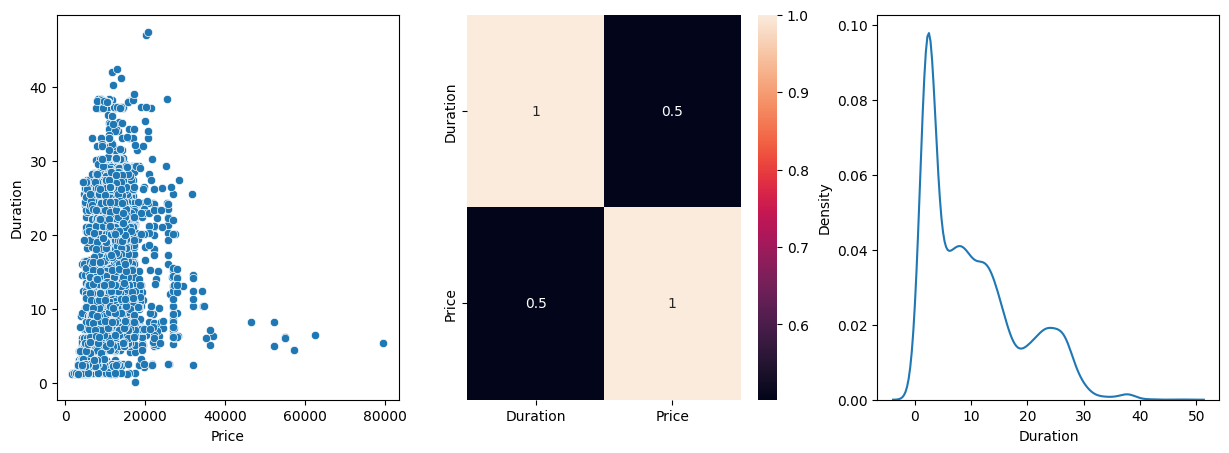

In [168]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.scatterplot(x="Price",y="Duration", data=data)
plt.subplot(132)
sns.heatmap(data[["Duration","Price"]].corr(),annot=True)
plt.subplot(133)
sns.kdeplot(x=data["Duration"])

C:\Users\saran\AppData\Local\Temp\ipykernel_12236\3562785665.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=data["Duration"],hue=data["Total_Stops"])


<Axes: xlabel='Duration', ylabel='Density'>

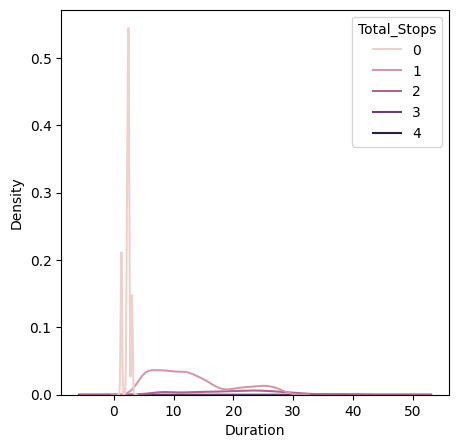

In [169]:
plt.figure(figsize=(5,5))
sns.kdeplot(x=data["Duration"],hue=data["Total_Stops"])

In [170]:
data.Duration.mode()

0    2.5
Name: Duration, dtype: float64

In [171]:
data.Duration.mean()

10.308291913592049

In [172]:
data.Duration.median()

8.25

In [173]:
# As duration of flight increase , the price will tends to increase( not so strongly)
# average Travel time(duration) is in between 8-10 hrs but maximum flights tooks about 2.5 hour for journey

<Axes: xlabel='Total_Stops', ylabel='Density'>

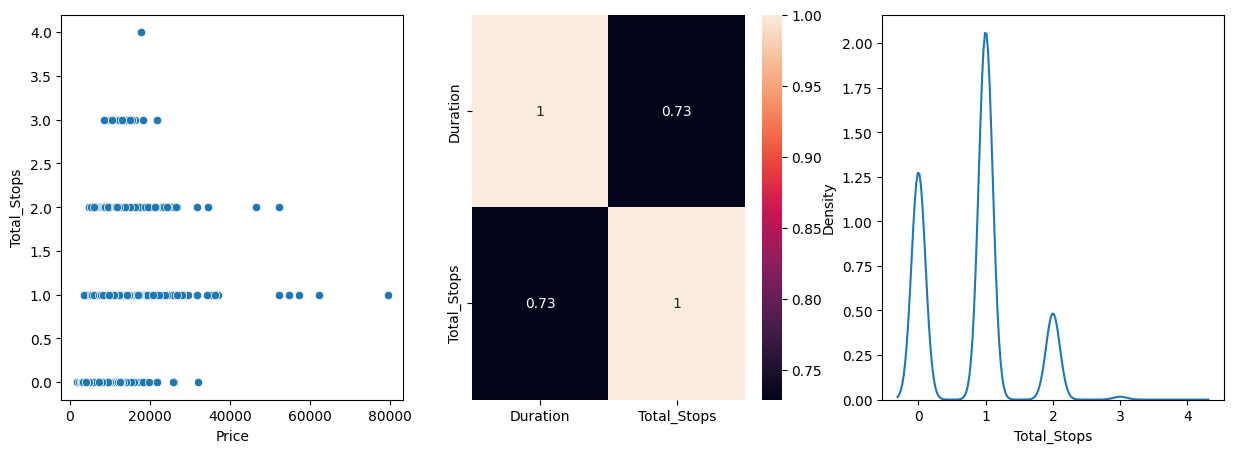

In [174]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.scatterplot(x="Price",y="Total_Stops", data=data)
plt.subplot(132)
sns.heatmap(data[["Duration","Total_Stops"]].corr(),annot=True)
plt.subplot(133)
sns.kdeplot(x=data["Total_Stops"])

<Axes: xlabel='Total_Stops', ylabel='Price'>

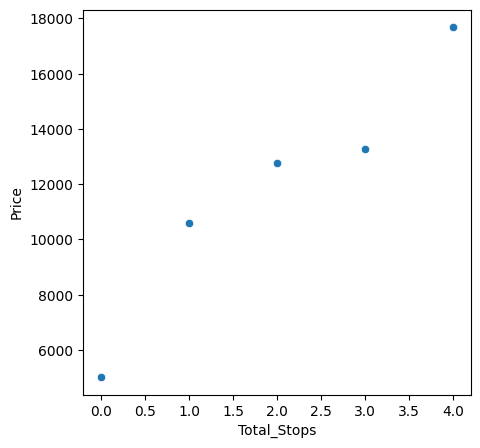

In [175]:
plt.figure(figsize=(5,5))
sns.scatterplot(data.groupby("Total_Stops").mean().Price)

In [176]:
# maximum flight have no intermediate stoping points as well as they tooks less duration of journey 
# As no. of intermediate stops increases the Average traveling cost increases

<Axes: xlabel='date_of_Journey', ylabel='Density'>

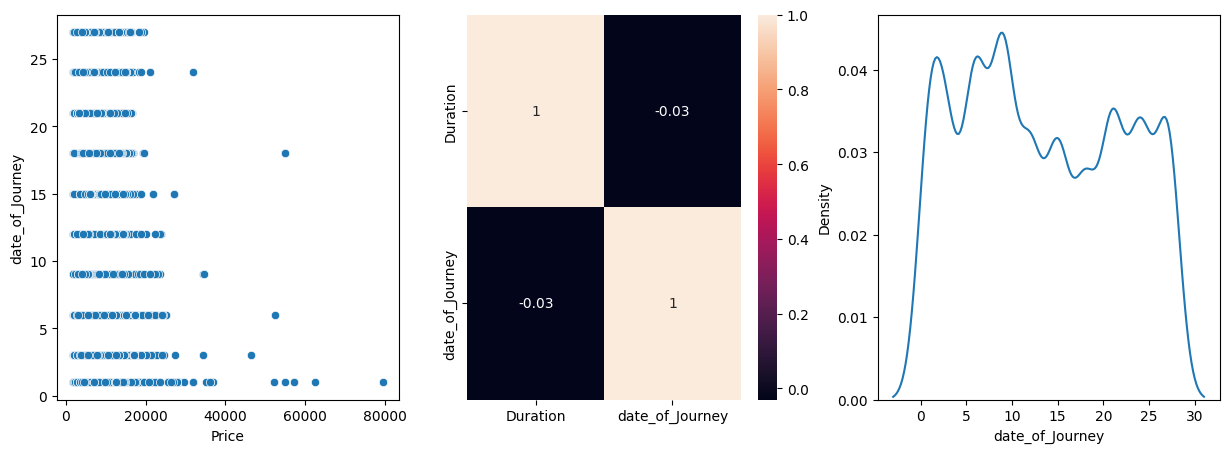

In [177]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.scatterplot(x="Price",y="date_of_Journey", data=data)
plt.subplot(132)
sns.heatmap(data[["Duration","date_of_Journey"]].corr(),annot=True)
plt.subplot(133)
sns.kdeplot(x=data["date_of_Journey"])

In [178]:
# there is no effect of day of journey on price

<Axes: xlabel='month_of_Journey', ylabel='Density'>

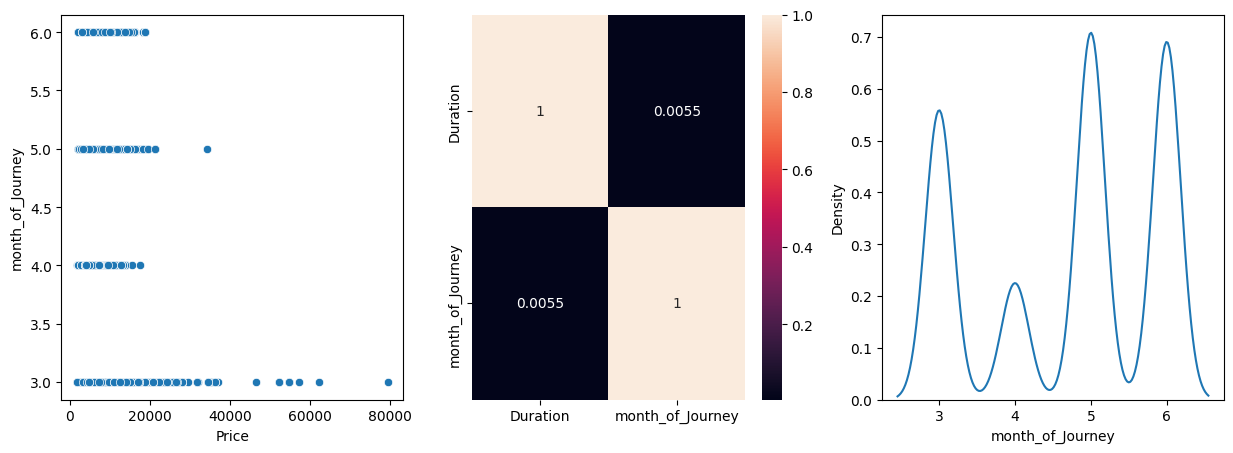

In [179]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.scatterplot(x="Price",y="month_of_Journey", data=data)
plt.subplot(132)
sns.heatmap(data[["Duration","month_of_Journey"]].corr(),annot=True)
plt.subplot(133)
sns.kdeplot(x=data["month_of_Journey"])

In [180]:
# there is no effect of month of journey on price

In [242]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_Journey,year_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10,2.50,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7.25,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25,19.00,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5.25,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4.45,1,No info,13302,1,3,2019


In [243]:
# Action - checking relations including source and destination
df1=df[["Source","Destination"]].copy()
df1.drop_duplicates(inplace=True)

In [246]:
df1.index=[i for i in range(len(df1))]
df1

,Source,Destination
0,Banglore,New Delhi
1,Kolkata,Banglore
2,Delhi,Cochin
3,Chennai,Kolkata
4,Banglore,Delhi
5,Mumbai,Hyderabad


In [248]:
for i in range(len(df1)):
    print(df1.loc[i,"Source"]," TO ",df1.loc[i,"Destination"],len(df[(df["Source"]==df1.loc[i,"Source"]) & (df["Destination"]==df1.loc[i,"Destination"])]))

Banglore  TO  New Delhi 914
Kolkata  TO  Banglore 2860
Delhi  TO  Cochin 4345
Chennai  TO  Kolkata 381
Banglore  TO  Delhi 1265
Mumbai  TO  Hyderabad 697


In [233]:
# maximum no. of people travel from Delhi  TO  Cochin 
# minimum number of people travel from Chennai  TO  Kolkata 

6

In [249]:
for i in range(len(df1)):
    print(df1.loc[i,"Source"]," TO ",df1.loc[i,"Destination"],df[(df["Source"]==df1.loc[i,"Source"]) & (df["Destination"]==df1.loc[i,"Destination"])].Price.sum())

Banglore  TO  New Delhi 10974783
Kolkata  TO  Banglore 26149219
Delhi  TO  Cochin 45455655
Chennai  TO  Kolkata 1824949
Banglore  TO  Delhi 6507057
Mumbai  TO  Hyderabad 3526617


In [253]:
df.groupby("Airline").Price.sum()

Airline
Air Asia                              1783293
Air India                            16188894
GoAir                                 1137045
IndiGo                               11580684
Jet Airways                          42916378
Jet Airways Business                   350152
Multiple carriers                    13039603
Multiple carriers Premium economy      148445
SpiceJet                              3533711
Trujet                                   4140
Vistara                               3729048
Vistara Premium economy                 26887
Name: Price, dtype: int64

In [254]:
# Jet Airways generate highest revenue among all Airline

In [258]:
df.drop("Additional_Info",axis=1,inplace=True)

In [259]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,date_of_Journey,month_of_Journey,year_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10,2.50,0,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7.25,2,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25,19.00,2,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5.25,1,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4.45,1,13302,1,3,2019


# Summary

* As duration of flight increase , the price will tends to increase( not so strongly)
* Average Travel time(duration) is in between 8-10 hrs but maximum flights tooks about 2.5 hour for journey
* maximum flight have no intermediate stoping points as well as they tooks less duration of journey 
* As no. of intermediate stops increases the Average traveling cost increases
* there is no effect of day of journey on price
* there is no effect of month of journey on price
* maximum no. of people travel from Delhi  TO  Cochin 
* minimum number of people travel from Chennai  TO  Kolkata 
* Jet Airways generate highest revenue among all Airline